# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.integrate as integ
%load_ext memory_profiler

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

##### Podpunkt 1.

Nie można całkować tej funkcji po dowolnym przedziale, ponieważ tangens nie jest funkcją ciągłą, a ponadto okresowo zmierza do nieskończoności na plusie i minusie. To wszystko sprawia, że nie spełnia warunków dotyczących całkowania, więc podstawiając funkcję z jego udziałem, przy źle dobranych granicach całkowania, dostaniemy nieprawidłowy wynik.

##### Podpunkt 2.

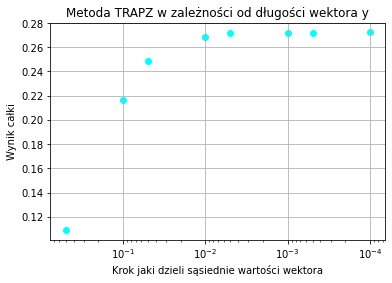

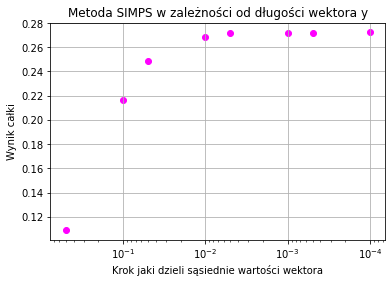

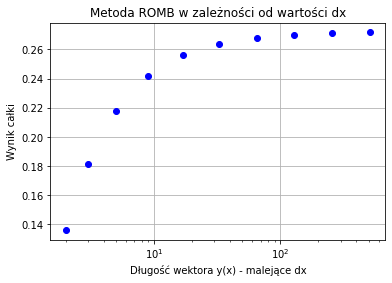

In [2]:
# Tworzenie wektorów

fun_1 = lambda x: np.log(1 + np.tan(x))
x_diff_len = []
step = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

for i in step:
    x_diff_len.append(np.arange(0, np.pi/4, i))

    
# METODA TRAPZ

integral_trapz = []  
for ans in x_diff_len:  
    integral_trapz.append(integ.trapz(fun_1(ans), x=ans, dx=1))

plt.figure()
for i in range(len(step)):
    plt.scatter(step[i], integral_trapz[i], color='cyan')
plt.gca().invert_xaxis()
plt.semilogx()
plt.grid()
plt.title('Metoda TRAPZ w zależności od długości wektora y')
plt.xlabel('Krok jaki dzieli sąsiednie wartości wektora')
plt.ylabel('Wynik całki')
plt.show()

                
# METODA SIMPS

integral_simps = []  
for ans in x_diff_len:
    integral_simps.append(integ.simps(fun_1(ans), x=ans, dx=1))

plt.figure()
for i in range(len(step)):
    plt.scatter(step[i], integral_simps[i], color='magenta')
plt.gca().invert_xaxis()
plt.semilogx()
plt.grid()
plt.title('Metoda SIMPS w zależności od długości wektora y')
plt.xlabel('Krok jaki dzieli sąsiednie wartości wektora')
plt.ylabel('Wynik całki')
plt.show()


# METODA ROMB

integral_romb = []
lenghts_y = []
for dx in range(0, 10):
    x1 = np.linspace(0, np.pi/4, 2**dx + 1)
    integral_romb.append(integ.romb(fun_1(x1), dx=np.pi/4/(2**dx + 1)))
    lenghts_y.append(len(x1))
    
plt.semilogx(lenghts_y, integral_romb, 'bo')
plt.title('Metoda ROMB w zależności od wartości dx')
plt.xlabel("Długość wektora y(x) - malejące dx")
plt.ylabel("Wynik całki")
plt.grid()
plt.show()

Komentarz: 
Jak widać, wszystkie trzy metody mają bardzo zbliżone wyniki, skąd wnioskuję, że różnice zaczną się gdzieś w okolicach 5/6 miejsca po przecinku. Warto również zaznaczyć to, iż długość wektora ma największe znaczenie na wynik całkowania. Z przedstawionych wykresów widać, że dopiero przy kroku 0.05 wektora y (tj. długości wektora na poziomie 15) wynik stabilizuje się na poprawnej wartości.

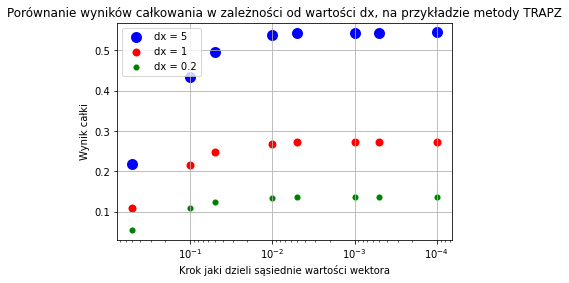

In [3]:
plt.figure()
for i in range(len(step)-1):
    plt.scatter(step[i], integ.trapz(fun_1(x_diff_len[i]), dx=2 * step[i]), color='blue', linewidth=5)
    plt.scatter(step[i], integ.trapz(fun_1(x_diff_len[i]), dx=step[i]), color='red', linewidth=2)
    plt.scatter(step[i], integ.trapz(fun_1(x_diff_len[i]), dx=0.5 * step[i]), color='green', linewidth=0.1)
i += 1
plt.scatter(step[i], integ.trapz(fun_1(x_diff_len[i]), dx=2 * step[i]), color='blue', linewidth=5, label='dx = 5')
plt.scatter(step[i], integ.trapz(fun_1(x_diff_len[i]), dx=step[i]), color='red', linewidth=2, label='dx = 1')
plt.scatter(step[i], integ.trapz(fun_1(x_diff_len[i]), dx=0.5 * step[i]), color='green', linewidth=0.1, label='dx = 0.2')

plt.gca().invert_xaxis()
plt.legend(loc='upper left')
plt.semilogx()
plt.grid()
plt.title('Porównanie wyników całkowania w zależności od wartości dx, na przykładzie metody TRAPZ')
plt.xlabel('Krok jaki dzieli sąsiednie wartości wektora')
plt.ylabel('Wynik całki')
plt.show()

Komentarz: 
Jak widać, wartości dx mają znaczenie na wynik całkowania, ponieważ wartość dx
oznacza jaki jest odstęp pomiędzy punktami z wektora y. Jeżeli błędnie ustawimy wartość, dostaniemy zły wynik całki. Geometrycznie oznacza to, że wykres został ściśnięty lub rozciągnięty na osi x. Wykres po takiej transformacji może mieć inne pole pod krzywą.


##### Podpunkt 3.

Uwaga: Ponieważ wszystkie 3 funkcje z podpunktu 2. dawały bardzo zbliżony rezultat, kolejne metody będę porównywał tylko z funkcją TRAPZ dla niezaciemniania wyników. 

In [4]:
print('Wynik całkowania dla metody QUAD:      ', integ.quad(fun_1, 0, np.pi/4)[0])
print('Wynik całkowania dla metody ROMBERG:   ', integ.romberg(fun_1, 0, np.pi/4))
print('Wynik całkowania dla metody QUADRATURE:', integ.quadrature(fun_1, 0, np.pi/4)[0])

x = np.arange(0, np.pi/4, 0.0000001)
print('Wynik całkowania dla metody TRAPZ:     ', integ.trapz(fun_1(x), x=x), ' -> Ilość punktów w wektorze na poziomie 1 MLN')

Wynik całkowania dla metody QUAD:       0.27219826128795027
Wynik całkowania dla metody ROMBERG:    0.27219826128795016
Wynik całkowania dla metody QUADRATURE: 0.27219826128795027
Wynik całkowania dla metody TRAPZ:      0.27219821734418975  -> Ilość punktów w wektorze na poziomie 1 MLN


Komentarz: Jak widać z powyższych wyników, metody ze zmiennym krokiem wektora y (tj. metoda QUAD, ROMBERG czy QUADRATURE) dają zdecydowanie lepsze wyniki niż metody z krokiem stałym, bo przy ogromnej liczbie punktów w wektorze y (na poziomie 1 MlN dla metody TRAPZ) nie jesteśmy w stanie uzyskać tak dużej dokładności.

### Sprawdzenie czasowe

Uwaga: Starałem się tak dobrać wektory x oraz x1, aby miały tę samą ilośc elementów, co rzetelnie odda sprawdzenie czasowe.

In [5]:
x = np.arange(0, np.pi/4, 0.001)
x1 = np.linspace(0, np.pi/4, 2**8+1)

print(' Średni czas wykonania całkowania dla metody TRAPZ: ')
trapz = %timeit -r 100 -n 100 -o integ.trapz(fun_1(x), x=x)

print('\n','Średni czas wykonania całkowania dla metody SIMPS: ')
simps = %timeit -r 100 -n 100 -o integ.simps(fun_1(x), x=x)

print('\n','Średni czas wykonania całkowania dla metody ROMB: ')
romb = %timeit -r 100 -n 100 -o integ.romb(fun_1(x1), dx=2**10+1)

print('\n','Średni czas wykonania całkowania dla metody QUAD: ')
quad = %timeit -r 100 -n 100 -o integ.quad(fun_1, 0, np.pi/4)[0]

print('\n','Średni czas wykonania całkowania dla metody ROMBERG: ')
romberg = %timeit -r 100 -n 100 -o integ.romberg(fun_1, 0, np.pi/4)

print('\n','Średni czas wykonania całkowania dla metody QUADRATURE: ')
quadrature =  %timeit -r 100 -n 100 -o integ.quadrature(fun_1, 0, np.pi/4)[0]

 Średni czas wykonania całkowania dla metody TRAPZ: 
33.2 µs ± 7.58 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody SIMPS: 
99 µs ± 13.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody ROMB: 
78.3 µs ± 11.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody QUAD: 
53 µs ± 7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody ROMBERG: 
36.9 µs ± 9.27 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody QUADRATURE: 
38.4 µs ± 8.17 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Komentarz: Czasy wykonywania się poszczegónych funkcji są różne. Najgorzej wypadły metody SIMPS oraz ROMB, mające dwukrotnie gorszy czas od 3 metod bardzo zbliżonych czasowo: TRAPZ, ROMBERG oraz QUADRATURE. Podsumowując, myślę że dokładność oraz złożoność czasową wszystkich metod, najlepiej wypadają te dwie ostatnie, mające zmienny krok całkowania.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

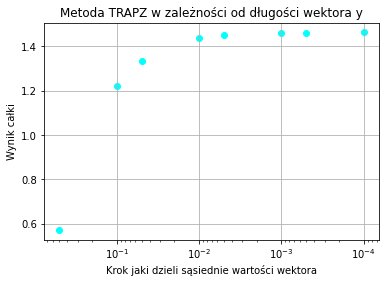

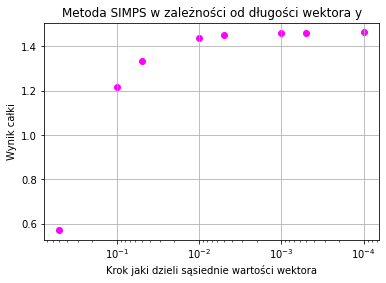

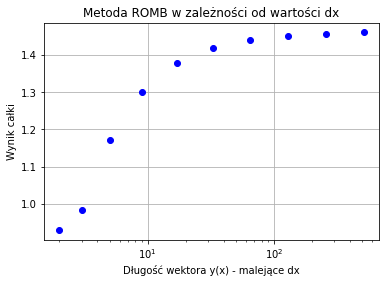

In [6]:
# Tworzenie wektorów

fun_2 = lambda x: np.exp(x**2)
x_diff_len = []
step = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

for i in step:
    x_diff_len.append(np.arange(0, 1, i))

    
# METODA TRAPZ

integral_trapz = []  
for ans in x_diff_len:  
    integral_trapz.append(integ.trapz(fun_2(ans), x=ans, dx=1))

plt.figure()
for i in range(len(step)):
    plt.scatter(step[i], integral_trapz[i], color='cyan')
plt.gca().invert_xaxis()
plt.semilogx()
plt.grid()
plt.title('Metoda TRAPZ w zależności od długości wektora y')
plt.xlabel('Krok jaki dzieli sąsiednie wartości wektora')
plt.ylabel('Wynik całki')
plt.show()

                
# METODA SIMPS

integral_simps = []  
for ans in x_diff_len:
    integral_simps.append(integ.simps(fun_2(ans), x=ans, dx=1))

plt.figure()
for i in range(len(step)):
    plt.scatter(step[i], integral_simps[i], color='magenta')
plt.gca().invert_xaxis()
plt.semilogx()
plt.grid()
plt.title('Metoda SIMPS w zależności od długości wektora y')
plt.xlabel('Krok jaki dzieli sąsiednie wartości wektora')
plt.ylabel('Wynik całki')
plt.show()


# METODA ROMB

integral_romb = []
lenghts_y = []
for dx in range(0, 10):
    x1 = np.linspace(0, 1, 2**dx + 1)
    integral_romb.append(integ.romb(fun_2(x1), dx=1/(2**dx + 1)))
    lenghts_y.append(len(x1))
    
plt.semilogx(lenghts_y, integral_romb, 'bo')
plt.title('Metoda ROMB w zależności od wartości dx')
plt.xlabel("Długość wektora y(x) - malejące dx")
plt.ylabel("Wynik całki")
plt.grid()
plt.show()

In [7]:
print('Wynik całkowania dla metody QUAD:      ', integ.quad(fun_2, 0, 1)[0])
print('Wynik całkowania dla metody ROMBERG:   ', integ.romberg(fun_2, 0, 1))
print('Wynik całkowania dla metody QUADRATURE:', integ.quadrature(fun_2, 0, 1)[0])

x = np.arange(0, 1, 0.0000001)
print('Wynik całkowania dla metody TRAPZ:     ', integ.trapz(fun_2(x), x=x), ' -> Ilość punktów w wektorze na poziomie 1 MLN')

Wynik całkowania dla metody QUAD:       1.4626517459071815
Wynik całkowania dla metody ROMBERG:    1.4626517459101032
Wynik całkowania dla metody QUADRATURE: 1.4626517458962958
Wynik całkowania dla metody TRAPZ:      1.4626514740790326  -> Ilość punktów w wektorze na poziomie 1 MLN


## Wnioski:

Na tych laboratoriach zapoznaliśmy się z tematem całkowania numerycznego. TO zagadnienie było niezwykle praktyczne, bo jest to jedyny sposób do aproksymowania wyników całek, na które nie ma analitycznych wyliczeń. Zasada działania całkowania numerycznego jest bardzo prosta - całkowanie w sensie Riemanna to suma poszczególnych pól czworokątów (m.in. prostokątów czy trapezów) co jest bardzo łatwe do zaimplementowania.

Szczegóły dotyczące zagadnień poruszonych przy okazji poszczególnych podpunktów zawarłem w komentarzach po każdym zadaniu, które jednocześnie można traktować jako wnioski.